In [2]:
import matplotlib.pyplot as plt
from matplotlib import markers
import numpy as np
import pandas as pd
import seaborn as sn

In [3]:
welding_data_filename = "welding_1020_steel.csv"
data = pd.read_csv(welding_data_filename, delimiter=",")

In [4]:
data.columns

Index(['Weld #', 'Amps (A)', 'Voltage (V)', 'Speed (ipm)', 'Push or Pull',
       'Arc Energy (kJ/in)', 'Penetration', 'Reinforcement', 'Height',
       'Width'],
      dtype='object')

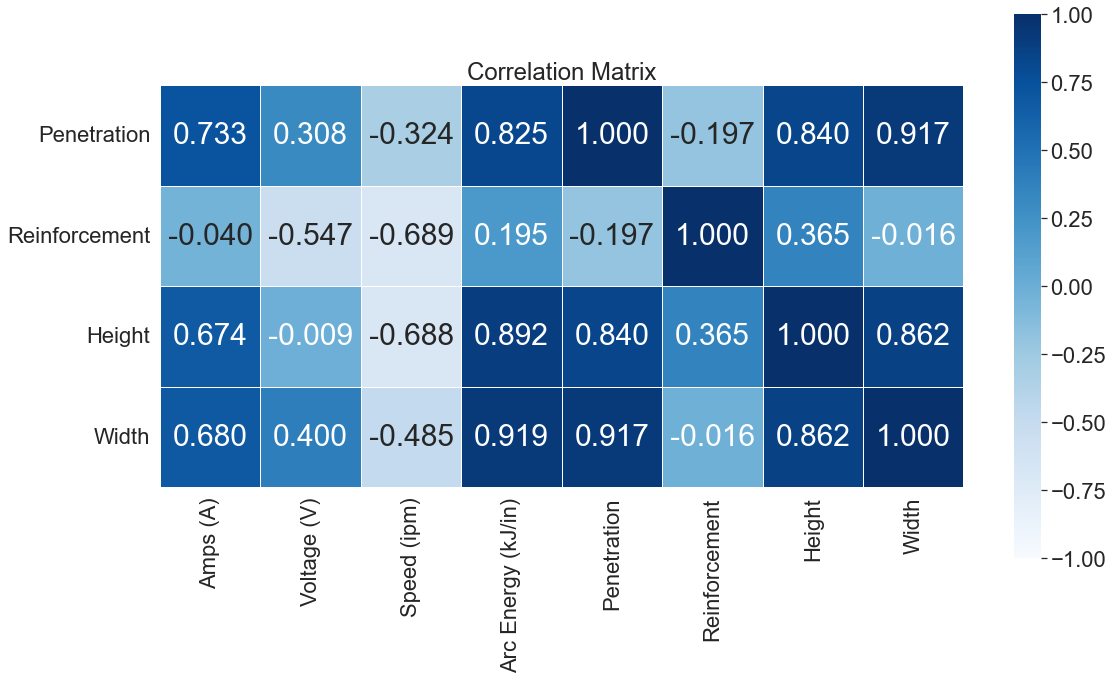

In [5]:
cols = ['Amps (A)', 'Voltage (V)', 'Speed (ipm)', 'Push or Pull',
       'Arc Energy (kJ/in)', 'Penetration', 'Reinforcement', 'Height',
       'Width']

scale = 2
direction = "Pull"  # Push, Pull
subset = data[data["Push or Pull"]==direction]
corr_data = subset[cols].corr(method='pearson')  # pearson, kendall, spearman
plt.figure(figsize=(scale*len(cols), scale*(len(cols)-4)))
sn.set(font_scale=scale)  # Label size
sn.heatmap(corr_data[4:],
annot=True, fmt=".3f", annot_kws={"size": scale*15},
cmap='Blues',
vmin=-1, vmax=1,
square=True,
linewidths=0.5)
plt.title("Correlation Matrix")
plt.savefig(f"welding_correlation_matrix_{direction}.png", bbox_inches="tight")

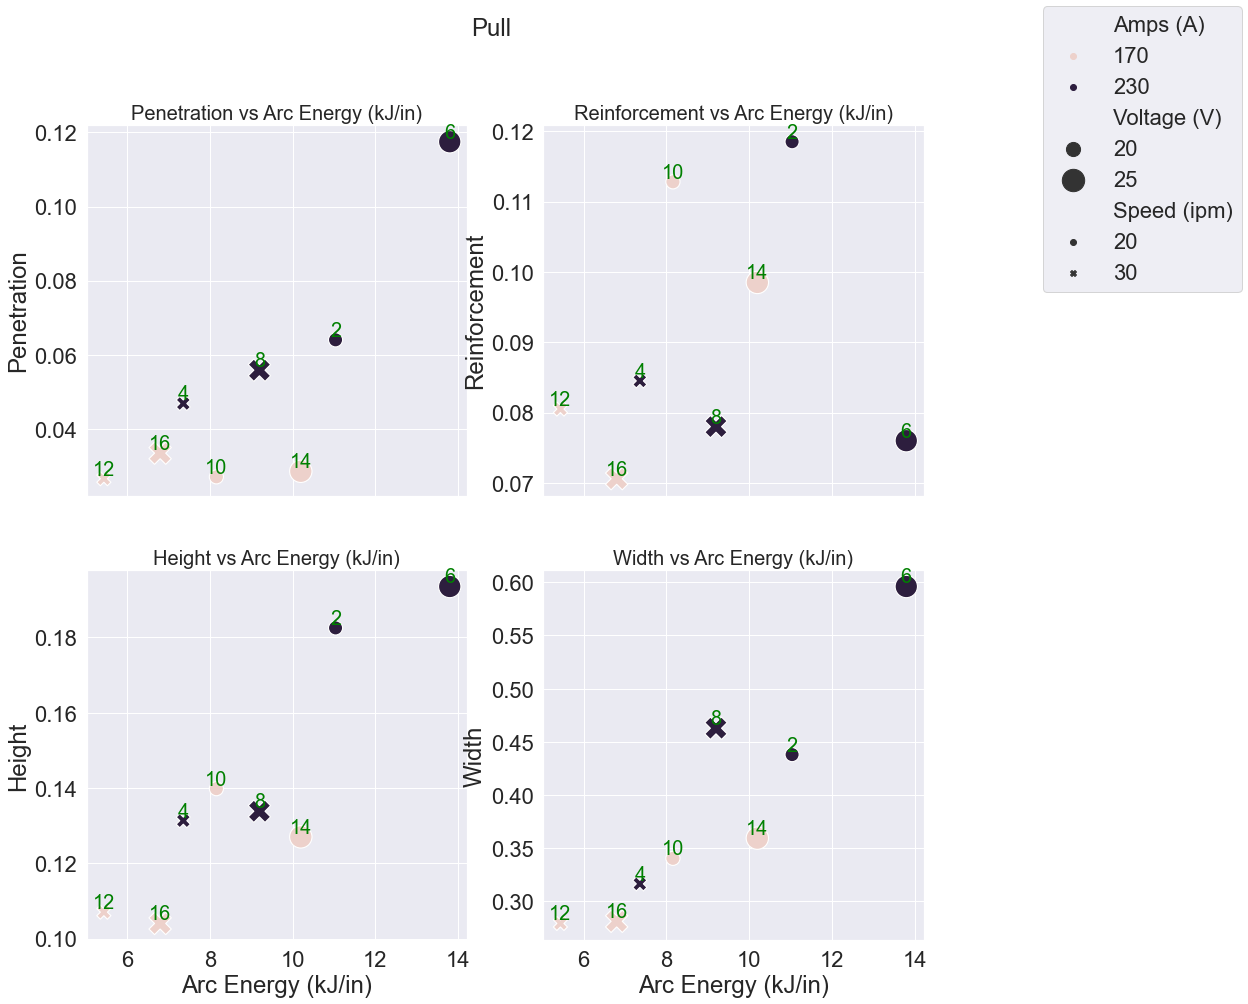

In [6]:
x = "Arc Energy (kJ/in)"
y = "Penetration"
y_keys =[
    ["Penetration", "Reinforcement"],
    ["Height", "Width"]
]
# hue, style, size
hue = "Amps (A)"
size = "Voltage (V)"
style = "Speed (ipm)"

direction = "Pull"  # Push, Pull
subset = data[data["Push or Pull"]==direction]

fig, axs = plt.subplots(2, 2, sharex=True)
fig.set_size_inches(15, 15)
for row, row_keys in zip(axs, y_keys):
    for ax, key in zip(row, row_keys):
        ax.set_title(f'{key} vs {x}', fontsize=20)
        sn.scatterplot(
            x=x, y=key,
            hue=hue,
            style=style,
            size=size,
            sizes=(200, 500),
            data=subset,
            ax=ax,
            legend=True if key=="Width" else False
        )
        for index, r in subset.iterrows():
            ax.annotate(r["Weld #"], (r[x], r[key]), ha='center', va='bottom', fontsize=20, color='green')
        if key=="Width":
            ax.get_legend().remove()
fig.legend(bbox_to_anchor=(1, 1), loc='upper left')
fig.suptitle(f'{direction}', fontsize=24)
plt.savefig(f"welding_data_{direction}.png", bbox_inches="tight")

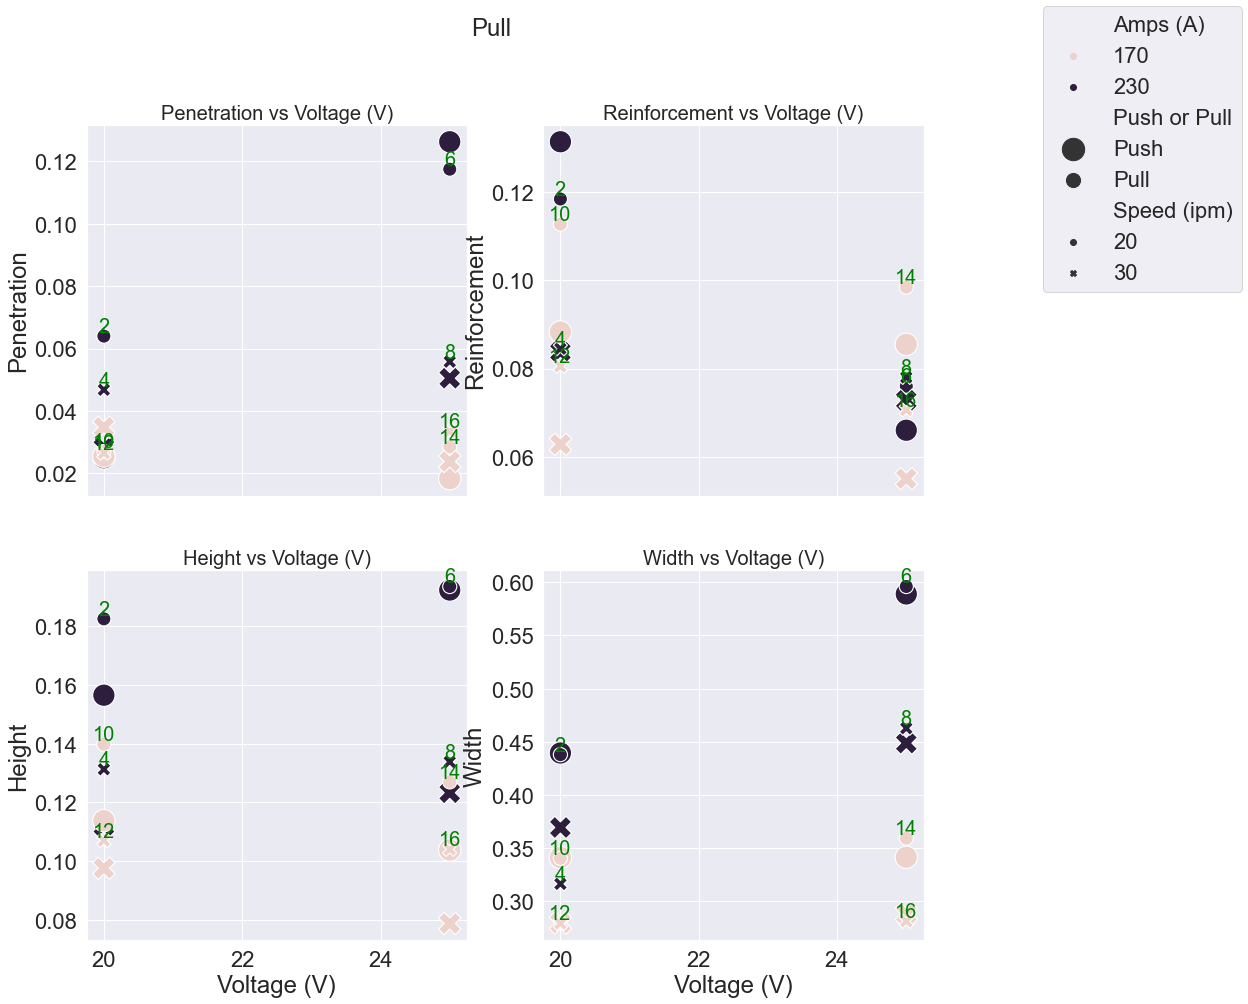

In [7]:
x = "Voltage (V)"
y = "Penetration"
y_keys =[
    ["Penetration", "Reinforcement"],
    ["Height", "Width"]
]
# hue, style, size
hue = "Amps (A)"
size = "Push or Pull"
style = "Speed (ipm)"



fig, axs = plt.subplots(2, 2, sharex=True)
fig.set_size_inches(15, 15)
for row, row_keys in zip(axs, y_keys):
    for ax, key in zip(row, row_keys):
        ax.set_title(f'{key} vs {x}', fontsize=20)
        sn.scatterplot(
            x=x, y=key,
            hue=hue,
            style=style,
            size=size,
            sizes=(200, 500),
            data=data,
            ax=ax,
            legend=True if key=="Width" else False
        )
        for index, r in subset.iterrows():
            ax.annotate(r["Weld #"], (r[x], r[key]), ha='center', va='bottom', fontsize=20, color='green')
        if key=="Width":
            ax.get_legend().remove()
fig.legend(bbox_to_anchor=(1, 1), loc='upper left')
fig.suptitle(f'{direction}', fontsize=24)
plt.savefig(f"welding_data_{direction}.png", bbox_inches="tight")

In [83]:

data1 = pd.DataFrame( data[data["Amps (A)"]==170] ).reset_index(drop=True)
data2 = pd.DataFrame( data[data["Amps (A)"]==230] ).reset_index(drop=True)

# data1 = pd.DataFrame( data[data["Voltage (V)"]==20] ).reset_index(drop=True)
# data2 = pd.DataFrame( data[data["Voltage (V)"]==25] ).reset_index(drop=True)

# data1 = pd.DataFrame( data[data["Speed (ipm)"]==20] ).reset_index(drop=True)
# data2 = pd.DataFrame( data[data["Speed (ipm)"]==30] ).reset_index(drop=True)

# data1 = pd.DataFrame( data[data["Push or Pull"]=="Push"] ).reset_index(drop=True)
# data2 = pd.DataFrame( data[data["Push or Pull"]=="Pull"] ).reset_index(drop=True)

data1["Weld #"]

og_cols = ["Penetration", "Reinforcement", "Height", "Width"]
new_cols = ["%Δ"+c for c in og_cols]


for col, new in zip(og_cols, new_cols):
    data1[new] = 100*(data2[col]-data1[col])/data1[col]
data1["Combine"] = data1["Weld #"].astype(str)+","+data2["Weld #"].astype(str)

data1

,Weld #,Amps (A),Voltage (V),Speed (ipm),Push or Pull,Arc Energy (kJ/in),Penetration,Reinforcement,Height,Width,%ΔPenetration,%ΔReinforcement,%ΔHeight,%ΔWidth,Combine
0,9,170,20,20,Push,8.16,0.0255,0.0883,0.1138,0.3413,-1.960784,48.924122,37.521968,28.772341,"9,1"
1,10,170,20,20,Pull,8.16,0.0270,0.1128,0.1398,0.3405,137.037037,5.053191,30.543634,28.634361,"10,2"
2,11,170,20,30,Push,5.44,0.0348,0.0628,0.0976,0.2798,-18.965517,33.439490,14.754098,32.058613,"11,3"
3,12,170,20,30,Pull,5.44,0.0265,0.0805,0.1070,0.2793,76.603774,4.968944,22.710280,13.319012,"12,4"
4,13,170,25,20,Push,10.20,0.0183,0.0855,0.1038,0.3415,590.163934,-22.807018,85.260116,72.474378,"13,5"
5,14,170,25,20,Pull,10.20,0.0285,0.0985,0.1270,0.3595,312.280702,-22.842640,52.362205,65.785814,"14,6"
6,15,170,25,30,Push,6.80,0.0238,0.0550,0.0788,0.2883,112.184874,32.363636,56.472081,55.671176,"15,7"
7,16,170,25,30,Pull,6.80,0.0334,0.0706,0.1040,0.2813,67.065868,10.481586,28.653846,64.521863,"16,8"
